#Kuler: PCA/kmeans

##Import modules

In [8]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import scipy as sp

# plotting
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
import matplotlib.cm as pltcm
%matplotlib inline

##load dataframes and ndarrays

In [10]:
df_ = pd.read_pickle('kuler_df_')
df_all = pd.read_pickle('kuler_df_all')
data_pair = np.load('kuler_data_pair.npy')
data_LabAll = np.load('kuler_data_LabAll.npy')

## run PCA and create a 2D/3D plot

In [11]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
def PCA_test(X,N,index1=0,index2=0):
    # viewpoint
    if index1 == 'a' and index2 == 'b':
        el = 90
        az = -90
    elif index1 == 'L' and index2 == 'a':
        el = 0
        az = 90
    elif index1 == 'L' and index2 == 'b':
        el = 0
        az = 180
    elif int(index1) == 0 and int(index2) == 0:
        el = None
        az = None
        
    pca = PCA(n_components=N)
    pca.fit(X)
    PCA(copy=True, n_components=3, whiten=False)
    print(pca.explained_variance_ratio_) 
    print(pca.score(X))
    Y = pca.transform(X)

    fig = plt.figure(1, figsize=(7, 7))
    if N == 3:
        ax = Axes3D(fig)
        ax.view_init(elev=el,azim=az)
        ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2],alpha=0.2)
    elif N == 2:
        plt.scatter(Y[:, 0], Y[:, 1],alpha=0.2)

[ 0.28229556  0.18941837]
-42.0792082719


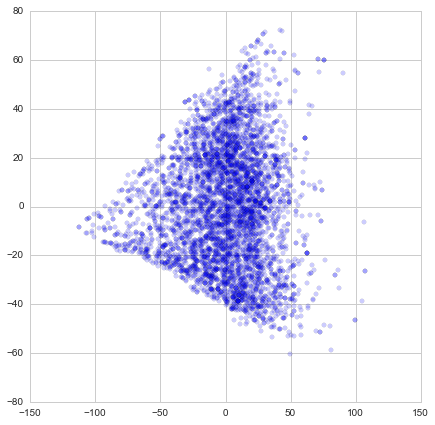

In [15]:
PCA_test(data_pair,2)

[ 0.28229556  0.18941837  0.14331591]
-41.8263432149


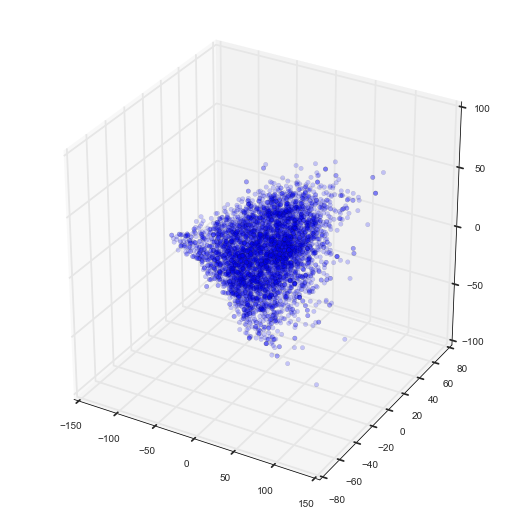

In [16]:
PCA_test(data_pair,3)

[ 0.18359344  0.16506958]
-69.7138816304


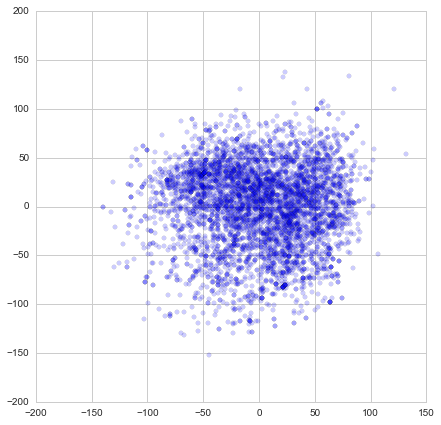

In [18]:
PCA_test(data_LabAll,2)

[ 0.18359344  0.16506958  0.12687431]
-69.3587801343


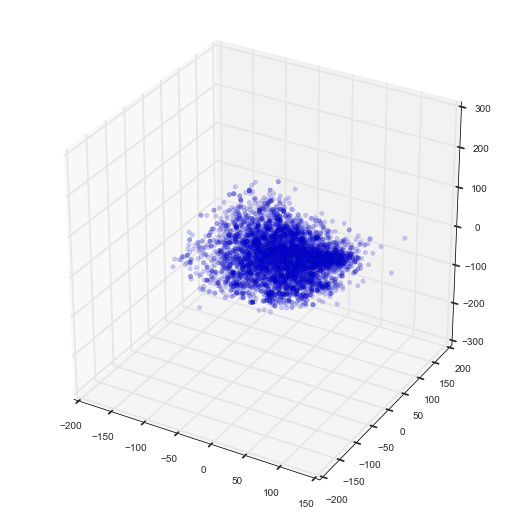

In [19]:
PCA_test(data_LabAll,3)